In [10]:
from __future__ import division, print_function
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [11]:
data = pd.read_csv('../../data/microchip_tests.txt', header=None, 
                  names=('test1', 'test2', 'released'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [12]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [30]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

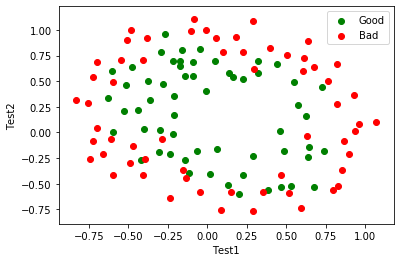

In [32]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Good')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Bad')
plt.xlabel('Test1');
plt.ylabel('Test2');
plt.legend();

In [34]:
def plot_bound(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                        np.arange(y_min, y_max, grid_step))
    
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(),
                                                   yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [41]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 36)

In [43]:
def print_logit(C, grid_step):
    logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
    logit.fit(X_poly, y)

    plot_bound(logit, X, y, grid_step, poly_featurizer=poly)

    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Good')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Bad')
    plt.xlabel("Test1")
    plt.ylabel("Test2")
    plt.legend();

    print("Score:", round(logit.score(X_poly, y), 3))

Score: 0.627


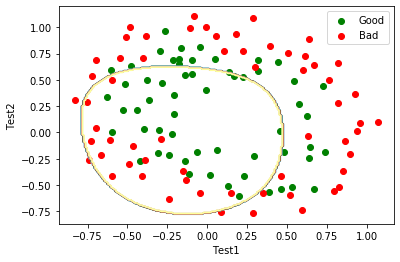

In [44]:
print_logit(0.01, 0.01)

Score: 0.831


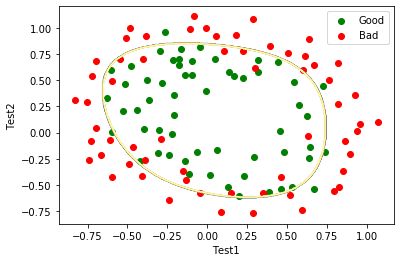

In [45]:
print_logit(1, 0.005)

Score: 0.864


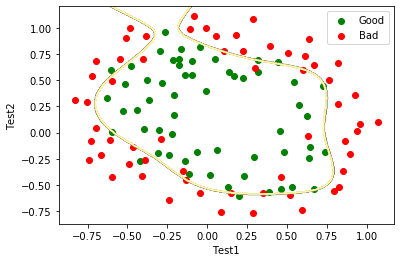

In [46]:
print_logit(1e4, 0.005)

In [48]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, n_jobs=-1)
logit_searcher.fit(X_poly, y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [51]:
logit_searcher.C_

array([150.78450459])

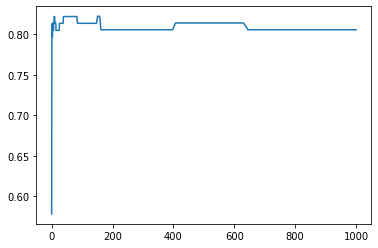

In [53]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0));